      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1453 rows x 5 columns]


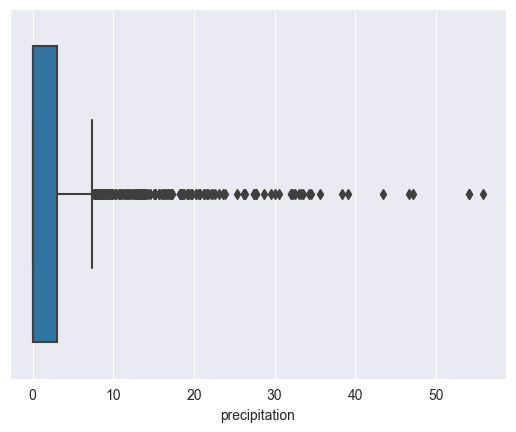

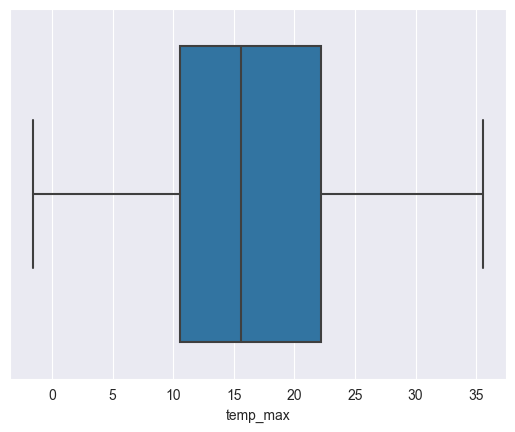

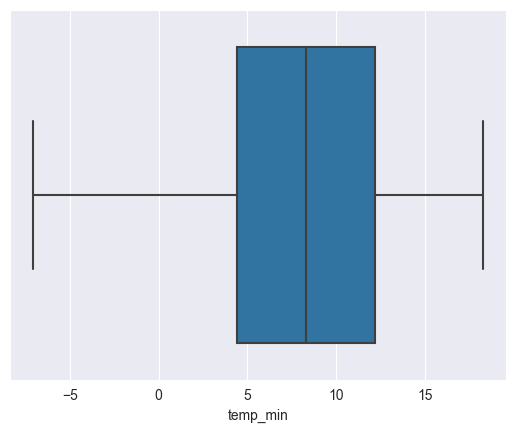

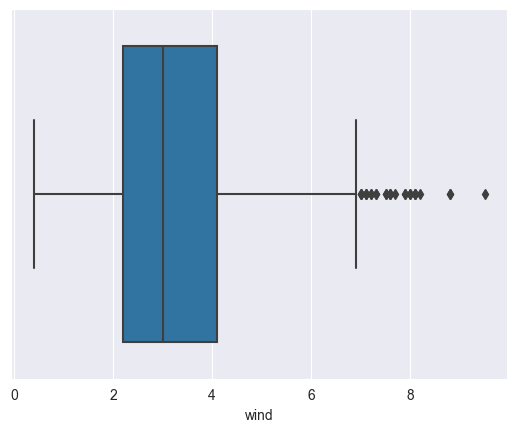

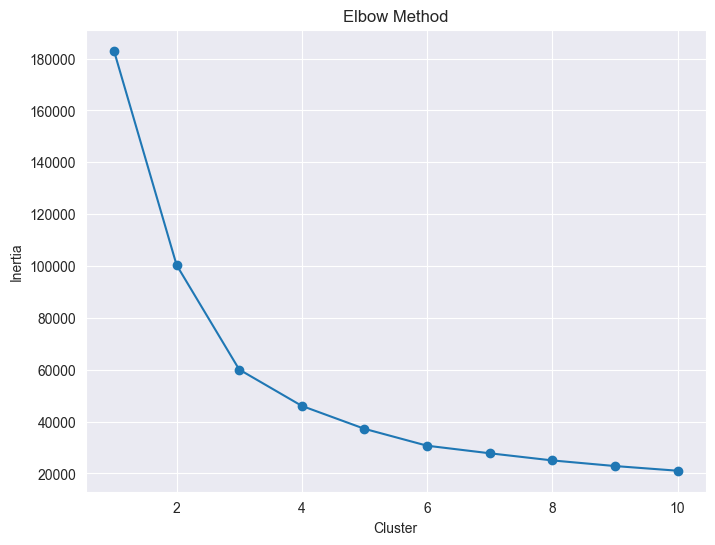

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9128440366972477
Precision: 0.9127771301273729
Recall: 0.9128440366972477
F1 Score: 0.9122051431850271


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import os

# Load dataset
df = pd.read_csv('seattle-weather.csv')
df.head()

# Drop unnecessary columns
df.drop(columns=['date'], inplace=True)
df.isnull().sum()

# Remove duplicates
df = df.drop_duplicates()

# Map weather categories to numbers
mapping = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}
df['weather'] = df['weather'].map(mapping)

# Print updated DataFrame
print(df)

# Define the features
column = ['precipitation', 'temp_max', 'temp_min', 'wind']
df[column].describe()

# Plot boxplots for each feature
for cols in column:
    sns.boxplot(x=df[cols])
    plt.show()

# Elbow method to find optimal K for KMeans clustering
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df[column])  # Use only numerical columns for KMeans
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Standard scaling for clustering and KNN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[column])  # Fit scaler on numerical columns only

# Apply KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Save updated dataframe to CSV
df.to_csv('data_baru.csv', index=False)
df_clean = pd.read_csv("data_baru.csv")
df_clean.head(100)

# Define X and y for KNN classification
X = df[column]  # Use only the selected 4 features
y = df['cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up KNN classifier and GridSearch
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get best parameters and fit model
print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Fit the best KNN model
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Save your KNN model and scaler after training


In [14]:
import joblib
joblib.dump(best_knn, 'knn_model.pkl')



['knn_model.pkl']

In [15]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
print("Accuracy:", accuracy)


Accuracy: 0.9128440366972477
